## Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis - January 2018

In [3]:
data_2018_01 = pd.read_csv('yellow_tripdata_2018-01.csv') 

In [4]:
data_2018_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [5]:
data_2018_01['tpep_pickup_datetime'] = pd.to_datetime(data_2018_01.tpep_pickup_datetime)
data_2018_01['tpep_dropoff_datetime'] = pd.to_datetime(data_2018_01.tpep_dropoff_datetime)

In [13]:
data_2018_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [5]:
data_2018_01.nunique()

VendorID                       2
tpep_pickup_datetime     2311493
tpep_dropoff_datetime    2315061
passenger_count               10
trip_distance               4397
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 259
DOLocationID                 261
payment_type                   4
fare_amount                 1714
extra                         41
mta_tax                       15
tip_amount                  3397
tolls_amount                 967
improvement_surcharge          4
total_amount               11513
dtype: int64

## Demand

### Hourly pick-up demand for taxi ride in January 2018 in whole NYC area - hourly plot

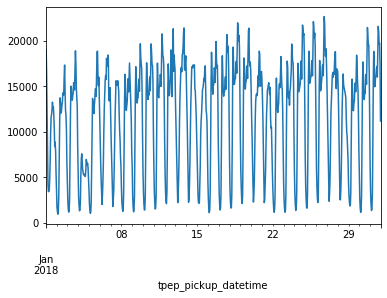

In [84]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['total_amount'].count().resample('h').sum().plot()

### Hourly and weekday distribution of pick-up demand for taxi ride in NYC

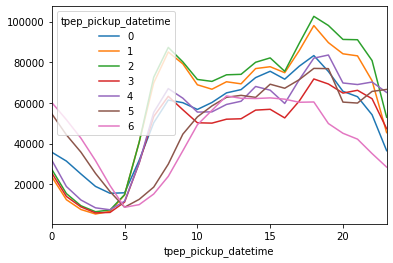

In [159]:
# The day of the week with Monday=0, Sunday=6.
(data_2018_01.groupby([data_2018_01['tpep_pickup_datetime'].dt.hour, data_2018_01['tpep_pickup_datetime'].dt.weekday])['fare_amount'].count()).unstack().plot(kind='line')

In [32]:
pickup_count = np.histogram(
    data_2018_01['tpep_pickup_datetime'].dt.hour, bins=24, range=(0,24))

<BarContainer object of 24 artists>

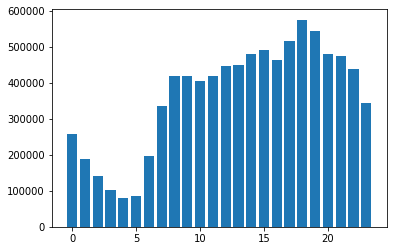

In [45]:
# hourly pickup demand
plt.bar(pickup_count[1][:-1], pickup_count[0])

## Fare and tips for drivers

### Hourly distribution of mean fare in NYC

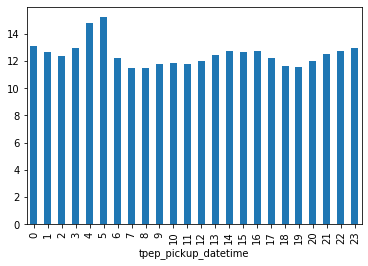

In [7]:
(data_2018_01.groupby(data_2018_01['tpep_pickup_datetime'].dt.hour)['fare_amount'].mean()).plot(kind='bar')

### Hourly and weekday distribution of mean fare for taxi ride in NYC

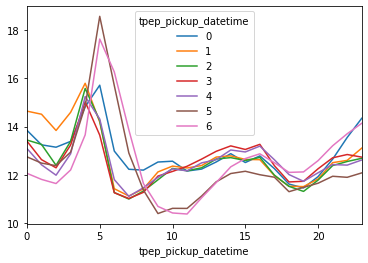

In [158]:
# The day of the week with Monday=0, Sunday=6.
(data_2018_01.groupby([data_2018_01['tpep_pickup_datetime'].dt.hour, data_2018_01['tpep_pickup_datetime'].dt.weekday])['fare_amount'].mean()).unstack().plot(kind='line')

### Total amount of taxi ride prices in January 2018 in ehole NYC area - hourly data plot

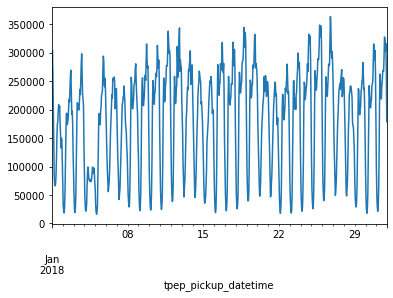

In [54]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['total_amount'].sum().resample('h').sum().plot()

### Total amount of taxi ride fare and tips for the drivers in January 2018 in whole NYC area - hourly data plot

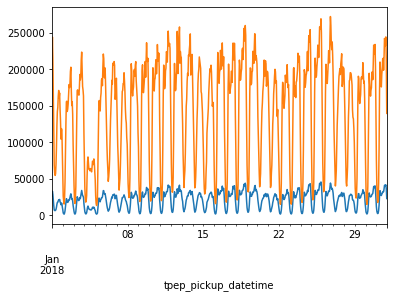

In [57]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['tip_amount'].sum().resample('h').sum().plot()
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['fare_amount'].sum().resample('h').sum().plot()

### Average taxi ride fare and tips for the drivers in January 2018 in whole NYC area - hourly data plot

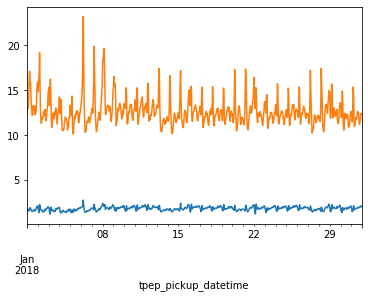

In [170]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['tip_amount'].mean().resample('h').mean().plot()
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['fare_amount'].mean().resample('h').mean().plot()

### Tips for drivers as ratio of total price for taxi rides in January 2018 in whole NYC area - hourly data plot

In [111]:
ratio_lst = [x/y  if y != 0 else 0 for x, y  in zip(data_2018_01['tip_amount'],data_2018_01['total_amount'])]

In [113]:
data_2018_01['tip_ratio'] = ratio_lst

In [114]:
data_2018_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date-hour,tip_ratio
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,"01/01/2018, 00",0.000000
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,"01/01/2018, 00",0.000000
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,"01/01/2018, 00",0.120482
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,"01/01/2018, 00",0.000000
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,"01/01/2018, 00",0.166163


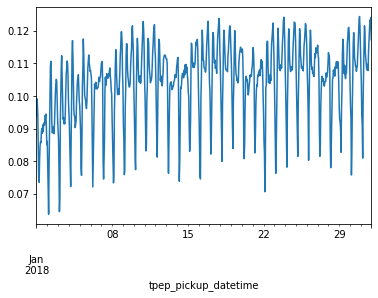

In [116]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) ].groupby(['tpep_pickup_datetime'])['tip_ratio'].mean().resample('h').mean().plot()

I can see that there is weekly seasonality in tip ratio - should be taken into account

### Average minutely tips for the drivers in January 2018 in whole NYC area 

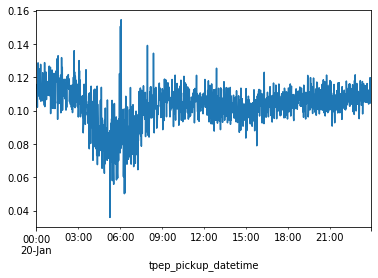

In [142]:
# minutely demand in NYC
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1)  & (data_2018_01['tpep_pickup_datetime'].dt.day == 20)].groupby(['tpep_pickup_datetime'])['tip_ratio'].mean().resample('T').mean().plot()

## Trip distance

### Hourly distribution of mean trip distance in NYC

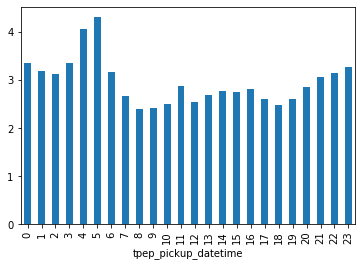

In [19]:
(data_2018_01.groupby(data_2018_01['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean()).plot(kind='bar')

### Average minutely trip distance in January 2018 in whole NYC area 

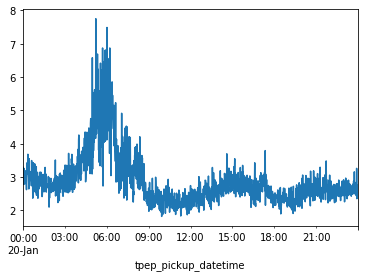

In [151]:
data_2018_01[(data_2018_01['tpep_pickup_datetime'].dt.year > 2017) & (data_2018_01['tpep_pickup_datetime'].dt.month == 1) & (data_2018_01['trip_distance'] < 100) & (data_2018_01['tpep_pickup_datetime'].dt.day == 20)].groupby(['tpep_pickup_datetime'])['trip_distance'].mean().resample('T').mean().plot()